# Predicting Multi-MNIST digits.

The assignment consists of three tasks:

1. A multi-class classification problem: the prediction of grayscale images of double-digit numbers from a custom version of the (Multi-)MNIST dataset.

2. Unsupervised problem: the implementation of an AutoEncoder model for the encoding and reconstruction of the provided data.

3. You can choose between (one of them is mandatory, you can choose which one to do):

*   Use latent representation of autoencoder as a feature reduction
*   Explain Neural Network predictions


The dataset is created by simply concatenating pairs of MNIST digits, and the number of classes (originally all the numbers in the [0, 100] range) has been reduced.

An example of the provided dataset is the following:

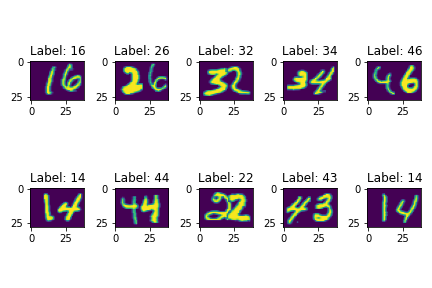

The provided data comprises the training set that can be used for the training (and for the validation) and the test set.

**General considerations**

Always describe and give proper motivations about the choices made during the assignment, including (but not limited to)

- data processing,
- network design: including number and dimension of the layers, regularization techniques (when requested).
- optimization algorithms, including hyperameters and criterions,
- model training hyperparameters
- loss/metric curves
- final evaluations and comparisons.


**Note**: Make sure that the outputs in the notebook cells are still visible once the notebook is exported (especially for html embeddings)

**Note**: Make sure that the submitted *.zip archives are not corrupted.

**Note**: convolutional layers should not be used all over this notebook (with the exception of the optional part).

## Inspecting the data

any comment about data dimensionality/distribution goes here

In [1]:
# import libraries
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [3]:
x_train.shape

(72247, 28, 39)

From the result obtained it can be seen that there are 72247 samples, each of size 28x39. Since there is no fourth channel with RGB the images could be black and white. 

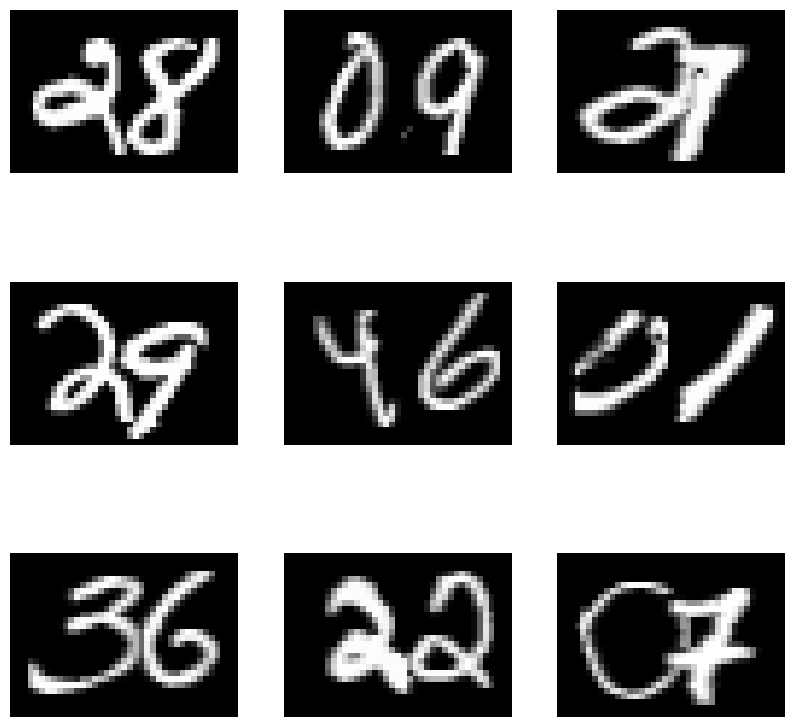

In [4]:
# View 9 images of the dataset
num_images = 9

plt.figure(figsize=(10, 10))

# Loop to display the first 'num_images' images
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray') 
    plt.axis('off') 

plt.show()


The nine images are all in black and white, with white lettering on a black background

In [5]:
# Show how many categories are present in dataset
print('Number of categories:',len(set(y_train)))

Number of categories: 50


In [6]:
# Checks the data type of x_train and x_test and displays the maximum and minimum values
print("Data type of x_train:", x_train.dtype)
print("Data type of x_test:", x_test.dtype)

print("Minimum value of x_train:", x_train.min())
print("Maximum value of x_train:", x_train.max())

Data type of x_train: uint8
Data type of x_test: uint8
Minimum value of x_train: 0
Maximum value of x_train: 255


In [7]:
# Calculate mean and standard deviation
mean_pixel = x_train.mean()
std_pixel = x_test.std()
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)


Mean pixel value: 45.94367316213898
Standard deviation of pixel values: 86.22925981989721


From the results we can see that a mean of 45.94 indicates that the image has dark tones (being close to zero on a scale up to 255) and confirms the idea of a black background with white lettering. The standard deviation (86.22) measures the dispersion of pixel values. A high standard deviation indicates that pixel values vary significantly, consistent with images in which there are strong contrasts between black background and white text.

In [8]:
# Check for completely white or completely black images in the dataset
white_images = []
black_images = []

# Verification of each image in the dataset
for i in range(x_train.shape[0]):
    if np.all(x_train[i] == 1.0):
        white_images.append(i)
    elif np.all(x_train[i] == 0.0): 
        black_images.append(i)

print(f"Number of completely blank images: {len(white_images)}")
print(f"Number of completely black images: {len(black_images)}")

# Display five black and white images as an example
num_images_to_show = 5 

# View white images
plt.figure(figsize=(10, 5))
for i in range(min(num_images_to_show, len(white_images))):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[white_images[i]], cmap='gray')
    plt.title("White image")
    plt.axis('off')
plt.show()

# View black images
plt.figure(figsize=(10, 5))
for i in range(min(num_images_to_show, len(black_images))):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[black_images[i]], cmap='gray')
    plt.title("Black image")
    plt.axis('off')
plt.show()

Number of completely blank images: 0
Number of completely black images: 0


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

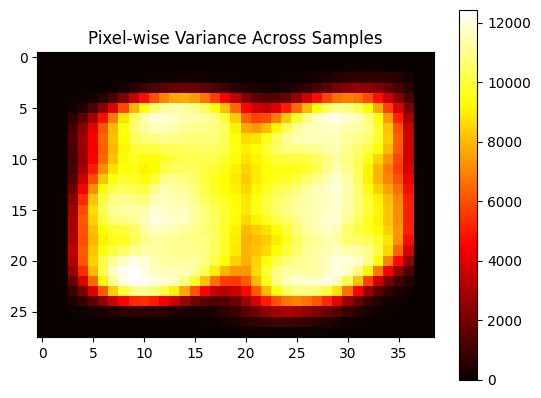

In [9]:
# Compute pixel-wise variance
pixel_variance = x_train.var(axis=0)

# Plot the pixel-wise variance
plt.imshow(pixel_variance, cmap='hot')
plt.colorbar()
plt.title("Pixel-wise Variance Across Samples")
plt.show()


In the displayed image, the yellow color, primarily located in the center, represents areas with the highest variance. These zones correspond to regions where white text appears, meaning they are the areas that change the most across images. In contrast, the red and black colors indicate lower variance, typical of background areas that remain mostly constant across different images.

C:\Users\lperf\AppData\Local\Temp\ipykernel_4264\3029322501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


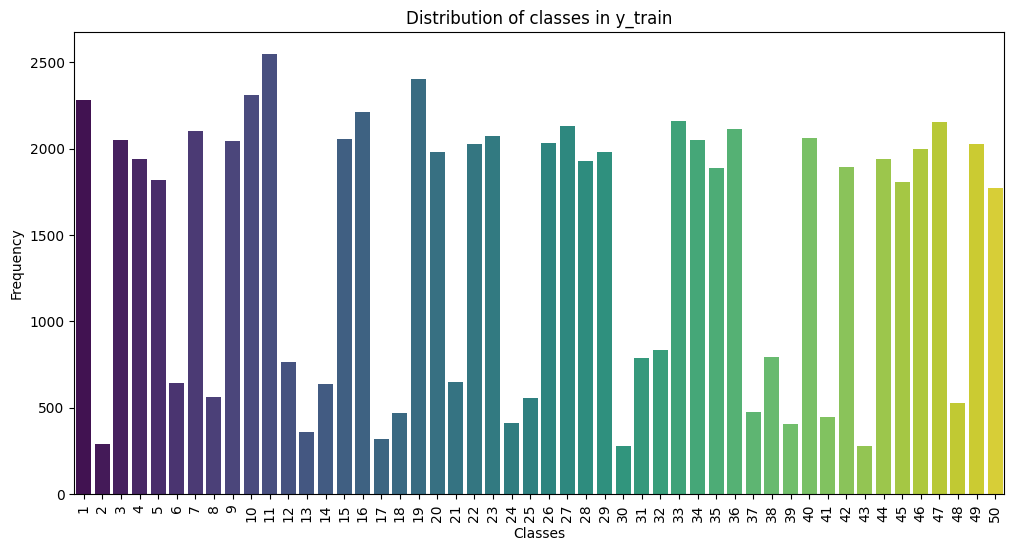

In [10]:
# Now you want to go and see the distribution of the various categories 
# contained in y_train. To do this we will use a bar graph
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of classes in y_train')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.show()

In [11]:
#  Displays the number of images for each class
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)


Class distribution: {1: 2282, 2: 292, 3: 2049, 4: 1941, 5: 1819, 6: 641, 7: 2102, 8: 560, 9: 2046, 10: 2311, 11: 2548, 12: 766, 13: 358, 14: 634, 15: 2055, 16: 2214, 17: 318, 18: 471, 19: 2403, 20: 1982, 21: 646, 22: 2029, 23: 2073, 24: 413, 25: 555, 26: 2034, 27: 2132, 28: 1926, 29: 1979, 30: 276, 31: 787, 32: 832, 33: 2159, 34: 2050, 35: 1885, 36: 2111, 37: 477, 38: 792, 39: 406, 40: 2060, 41: 444, 42: 1894, 43: 279, 44: 1940, 45: 1807, 46: 1995, 47: 2153, 48: 526, 49: 2025, 50: 1770}


From the inspecting the data, it was observed that the dataset consists entirely of black-and-white images, with a black background and white text. Furthermore, an analysis of class distribution revealed that the dataset is somewhat imbalanced. This was confirmed both through a graph and by printing the number of images per class. For instance, class 1 contains 2282 images, while class 2 has only 292. 

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
print('Size of the train set:', x_train.shape)
print('Size of the test set:', x_test.shape)

Size of the train set: (72247, 28, 39)
Size of the test set: (24083, 28, 39)


In [14]:
# Each image is transformed from a 2D matrix to a one-dimensional 
# vector of length 28*39=1092. This is to facilitate the NNs.
x_train = x_train.reshape(72247, 28 * 39)
x_test = x_test.reshape(24083, 28 * 39)

In [15]:
# Normalization 
x_train = x_train / 255
x_test = x_test / 255

# normalization the pixel values, which are originally 
# between 0 and 255, by reducing them to the range between 
# 0 and 1 by dividing by 255. This makes model training more 
# stable and efficient.

36

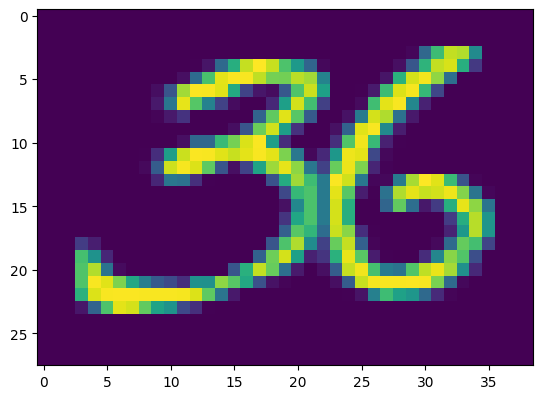

In [16]:
# It takes the sixth image from the training dataset 
# and reshapes it into a 28x39 matrix. 
# The class associated with this image is also shown
plt.imshow(x_train[6].reshape(28, 39))
y_train[6]

In [17]:
print(np.asarray(range(10)))
print(y_train[6].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
36


# 1. The resolution of the problem of supervised classification with traditional fully-connected neural networks. [Mandatory]





You are required to implement two models, without and with the use of one (or more) regularization technique of your choice, and to compare their behaviours, in terms of training dynamics and generalization capabilities.

## 1.1 Non-regularized Model

In this section, you are required to attempt to solve the classification task with the implementation and training of a standard fully-connected Neural Network, without the use of any specific regularization technique.

In [18]:
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import numpy as np

### 1.1.1 Building the network


any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)

In [19]:
dims = x_train.shape[1]

nb_classes = 51

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(nb_classes, activation = "softmax"))

model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

The network is constructed using the Sequential model of Keras. The network contains 5 dense layers. The first one takes as input a size equal to the length of the image vector. Each successive layer has a smaller size than the previous one (512, 256, 128, 64), a choice that allows the data complexity to be gradually reduced. The last layer has a size equal to the number of classes and uses a 'softmax' activation function to produce a probabilistic output for each of the 51 classes. SGD was chosen to be used as the optimizer because it was the one that returned better results than Adam. The best learning rate value was 0.01. 'sparse_categorical_crossentropy' was used as the loss function, which is suitable for classes represented as integers rather than one-hot encoded, since we are in a multi-class classification.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       559,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 51)             │         3,315 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 735,411 (2.81 MB)

 Trainable params: 735,411 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
n_epochs = 30
network_history = model.fit(
    x_train, y_train, batch_size=50,
                    epochs=n_epochs, validation_split=0.2)

Epoch 1/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1889 - loss: 3.3292 - val_accuracy: 0.6675 - val_loss: 1.1856
Epoch 2/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6998 - loss: 1.0512 - val_accuracy: 0.7651 - val_loss: 0.8272
Epoch 3/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7832 - loss: 0.7522 - val_accuracy: 0.8015 - val_loss: 0.6945
Epoch 4/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8171 - loss: 0.6333 - val_accuracy: 0.8272 - val_loss: 0.6045
Epoch 5/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8443 - loss: 0.5391 - val_accuracy: 0.8447 - val_loss: 0.5486
Epoch 6/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8629 - loss: 0.4728 - val_accuracy: 0.8537 - val_loss: 0.5027
Epoch 7/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8809 - loss: 0.4076 - val_accuracy: 0.8695 - val_loss: 0.4498
Epoch 8/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8940 - loss: 0.3583 - 

To train the model, it was decided to use 30 epochs and a batch_size of 50. In addition, the parameter 'validation_split=0.2' was set, reserving 20% of the data for validation during training.

### 1.1.2 Analyze and comment on thetraining results

Describe, visualize and interpret the training history and the resulting training dynamics.

In [ ]:
# functions to print loss, accuracy and mse graphs
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

def plot_mse(history):
  x_plot = list(range(1,len(history.history["mse"])+1))
  plt.figure()
  plt.title("Mean Squared Error (MSE)")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.plot(x_plot, history.history['mse'], label='Training MSE')
  plt.plot(x_plot, history.history['val_mse'], label='Validation MSE')

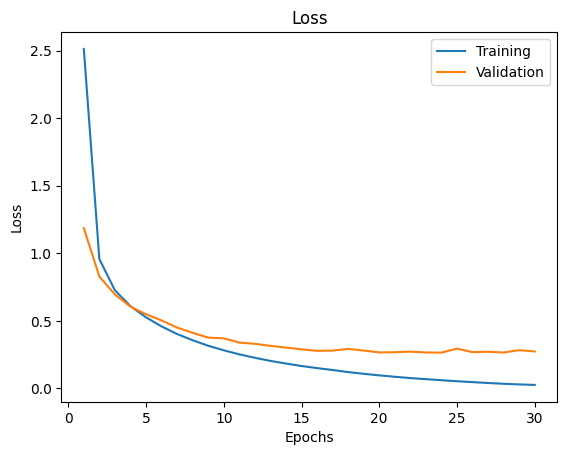

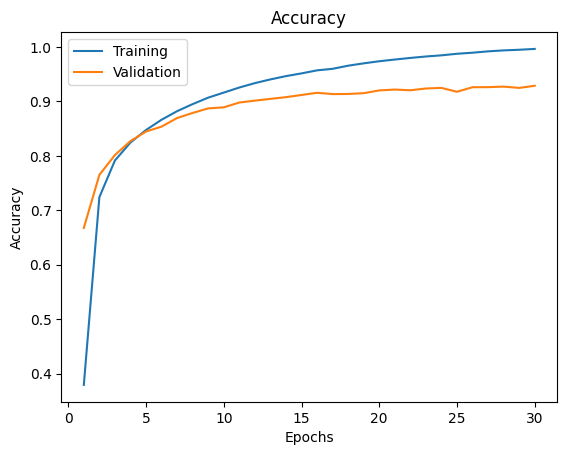

In [23]:
plot_loss(network_history)
plot_accuracy(network_history)

From the loss plot, it can be seen that the training loss decreases steadily as epochs pass, indicating that the model is learning from the training data and reducing error over time. For the validation loss, it follows a similar trend as the training loss, decreasing rapidly at the beginning and stabilizing toward the end. We notice that after about 10 epochs, the validation loss stabilizes and does not continue to improve significantly, while the training loss continues to decrease. And this could be a sign of overfitting. However, the overfitting seems moderate, so it might still be acceptable.
The accuracy on the training data increases steadily and appears to approach 1 as the epochs continue, indicating that the model fits the training data very well. Whereas, the accuracy on the validation data rises rapidly in the early epochs and then stabilizes around 0.9. This is a good result and indicates that the model can generalize quite well. 

### 1.1.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).

In [24]:
# Get predictions for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

# Print classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       801
           2       0.78      0.69      0.73        77
           3       0.91      0.94      0.93       638
           4       0.95      0.95      0.95       676
           5       0.94      0.94      0.94       606
           6       0.94      0.95      0.94       188
           7       0.90      0.95      0.92       697
           8       0.88      0.83      0.85       185
           9       0.91      0.91      0.91       667
          10       0.96      0.97      0.96       771
          11       0.98      0.98      0.98       876
          12       0.95      0.92      0.93       261
          13       0.86      0.90      0.88        82
          14       0.90      0.90      0.90       202
          15       0.96      0.96      0.96       687
          16       0.97      0.96      0.97       751
          17       0.90      0.88      0

In [25]:
# Evaluates the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)

# Print accuracy
print("Overall accuracy on the test set:", accuracy)


753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.2677
Overall accuracy on the test set: 0.9311132431030273


Analyzing the results in the classification report, it can be seen that the overall accuracy on the test data is 93%, which is a good value considering the variety and slight imbalance in the dataset. The model manages to generalize fairly well, maintaining high accuracy even on the test data. 
The dataset has an imbalance between classes. Despite this imbalance, the network performs quite well even on classes with fewer samples, but slightly lower performance is noted in these classes. In general, classes with a large number of samples have precision and recall greater than or equal to 95 percent, showing that the model recognizes them easily. For classes with less representation, recall tends to be lower than precision, suggesting that the model tend to incorrectly recognize these classes in some cases. However, even in the classes with fewer samples, the F1-score remains above 0.70, indicating that the model can distinguish the classes with good overall accuracy. 
As shown in the graph above, the final loss is about 0.26, a relatively low value indicating that the model has learned the patterns in the data well. This, combined with the high accuracy, suggests that the model is stable.

## 1.2 Regularized Model

Replicate the structure of section 1.1 (including subsections 1.1.1, 1.1.2, 1.1.3 and guidelines), this time with the implementation and training of a regularized network.

Implement _at least_ one regularization technique of your choice.

The overall model architecture can be either identical or different with respect to the one presented in sec 1.1 (your choice).

In [27]:
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

For regularization, we decided to use **L2 regularization** and **early stopping**. We also experimented with the Dropout technique, but it led to a noticeable decline in performance, so it was excluded.

L2 regularization was applied with a coefficient of 0.001, providing a moderate penalty. This value reduces overfitting without significantly limiting the model's ability to learn from the data. Early stopping, on the other hand, halts training when the performance on the validation data stops improving, thus preventing overtraining. The early stopping parameters used are:

- `patience=5`: training stops if the val_loss does not improve for 5 consecutive epochs.
- `min_delta=0.10`: to be considered an improvement, the val_loss must decrease by at least 0.10 compared to the previous epoch.

The neural network architecture used is the same as the one described in the previous section, with the same number of layers, nodes, and the same optimization algorithm as the non-regularized version. The adjustments made relate to training: in addition to adding early stopping, we increased the maximum number of epochs from 30 to 100 and set the `batch_size` from 50 to 128. This reduces the frequency of weight updates and enhances the model's efficiency.

### 1.2.1 Building the network


any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)

In [28]:
dims = x_train.shape[1]
nb_classes = 51

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(512, activation = "relu", kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model2.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model2.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model2.add(Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model2.add(Dense(nb_classes, activation = "softmax"))

model2.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.10)

n_epochs = 100
network_history2 = model2.fit(
    x_train, y_train, batch_size=128,
                    epochs=n_epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0682 - loss: 5.0673 - val_accuracy: 0.3292 - val_loss: 4.1141
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4282 - loss: 3.6834 - val_accuracy: 0.5721 - val_loss: 2.8266
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6191 - loss: 2.6619 - val_accuracy: 0.6794 - val_loss: 2.4185
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6970 - loss: 2.3326 - val_accuracy: 0.7275 - val_loss: 2.2044
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7447 - loss: 2.1500 - val_accuracy: 0.7601 - val_loss: 2.0818
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7652 - loss: 2.0409 - val_accuracy: 0.7746 - val_loss: 2.0090
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7849 - loss: 1.9645 - val_accuracy: 0.7936 - val_loss: 1.9401
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7994 - loss: 1.9005 - val_a

### 1.2.2 Analyze and comment on the training results

Describe, visualize and interpret the training history and the resulting training dynamics.

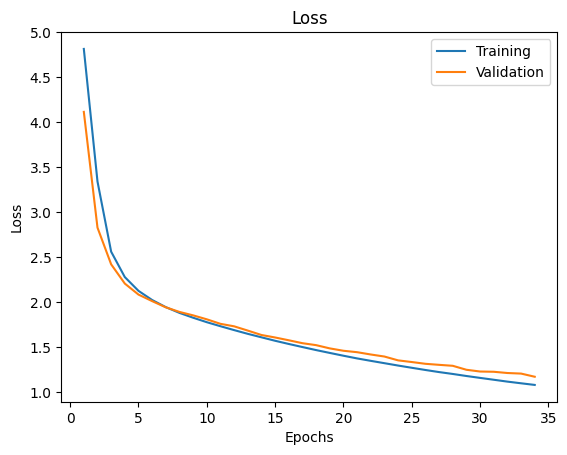

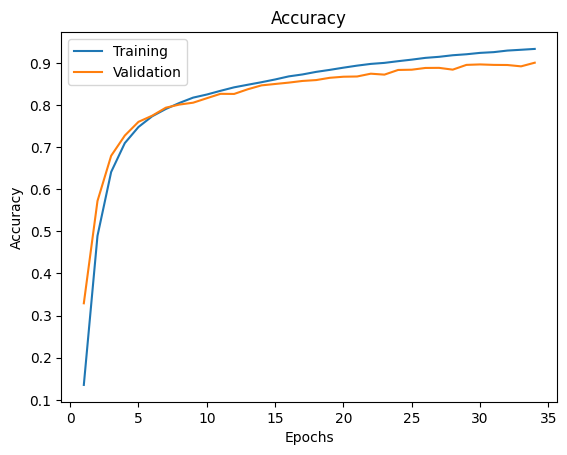

In [29]:
plot_loss(network_history2)
plot_accuracy(network_history2)

We can immediately notice that, thanks to the early stopping regularization technique, the model stops after approximately 35 epochs. From the loss graph for both training and validation, we observe a steady decrease over the epochs, indicating that the model is gradually minimizing error on both datasets. The training and validation loss curves are very close and follow a similar trend, with no signs of divergence. This is a positive sign, as it suggests that the model is not suffering from overfitting.

Similarly, in the accuracy graph for both training and validation, we see a rapid increase in the initial epochs, followed by a more gradual rise. Here as well, the curves remain close to each other with no indication of overfitting.

### 1.2.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).

In [30]:
# Get predictions for test set
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))


753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       801
           2       0.80      0.68      0.73        77
           3       0.93      0.89      0.91       638
           4       0.91      0.94      0.93       676
           5       0.87      0.95      0.91       606
           6       0.87      0.96      0.91       188
           7       0.90      0.90      0.90       697
           8       0.88      0.81      0.84       185
           9       0.85      0.89      0.87       667
          10       0.96      0.95      0.95       771
          11       0.97      0.97      0.97       876
          12       0.91      0.89      0.90       261
          13       0.88      0.84      0.86        82
          14       0.83      0.85      0.84       202
          15       0.94      0.95      0.94       687
          16       0.95      0.97      0.96       751
          17       0.85      0.80      0

In [31]:
# Evaluates the model on the test set
loss, accuracy = model2.evaluate(x_test, y_test)

# print accuracy
print("Overall accuracy on the test set:", accuracy)

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9049 - loss: 1.1574
Overall accuracy on the test set: 0.9049537181854248


From the classification report analysis, the model achieved an overall accuracy of about 90% on the test set. Considering the number of classes and the distribution of instances among them, this is a good result. The values of precision, recall and F1-score vary among the classes, those most represented tend to have higher values of F1-score. While, for the less represented classes tend to have lower performance, with lower recall and F1-score than the more balanced classes. The use of L2 regularization and early stopping helped to limit overfitting, as seen from the loss and accuracy curves for training and validation that follow a similar trend. There may be a problem, though, because despite the high overall accuracy, the loss is relatively high (1.15). This value could be a symptom that although the model can correctly classify many classes, there are other difficult classes that cause a higher penalty in the loss calculation. This phenomenon may be accentuated by the slight imbalance of classes.

## 1.3. Compare the performances of the two models (non-regularized and regularized) on the provided test set, visualize and comment on theresults

Visualize, describe and interpret the evaluation procedure and results on the provided test set, with a focus on the generalization capability of your models.



In [32]:
# Evaluation of the model without regularization
test_loss_no_reg, test_acc_no_reg = model.evaluate(x_test, y_test, verbose=0)
print("Model without regularization - Test Loss:", test_loss_no_reg)
print("Model without regularization - Test Accuracy:", test_acc_no_reg)

# Evaluation of the model with regularization
test_loss_with_reg, test_acc_with_reg = model2.evaluate(x_test, y_test, verbose=0)
print("Model with regularization - Test Loss:", test_loss_with_reg)
print("Model with regularization - Test Accuracy:", test_acc_with_reg)

Model without regularization - Test Loss: 0.2604321241378784
Model without regularization - Test Accuracy: 0.9311132431030273
Model with regularization - Test Loss: 1.152091383934021
Model with regularization - Test Accuracy: 0.9049537181854248


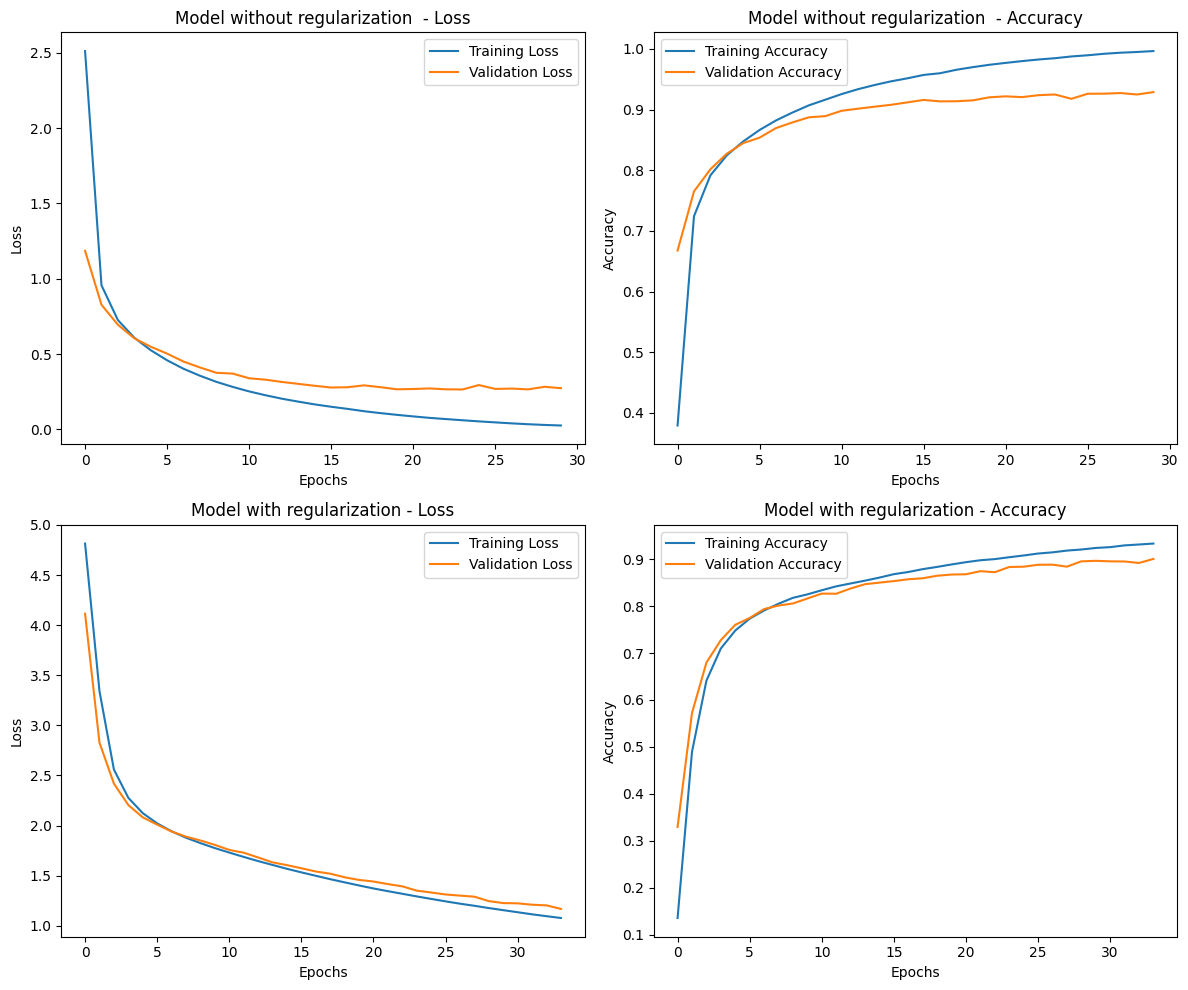

In [33]:
# Print the graphs obtained in sections 1.1 and 1.2 so as 
# to speed up the comparison between them
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First line, first graph: Model loss without regularization
axs[0, 0].plot(network_history.history['loss'], label='Training Loss')
axs[0, 0].plot(network_history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title("Model without regularization  - Loss")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend()

# First line, second graph: Accuracy of the model without regularization
axs[0, 1].plot(network_history.history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(network_history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title("Model without regularization  - Accuracy")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].legend()

# Second line, first graph: Model loss with regularization
axs[1, 0].plot(network_history2.history['loss'], label='Training Loss')
axs[1, 0].plot(network_history2.history['val_loss'], label='Validation Loss')
axs[1, 0].set_title("Model with regularization - Loss")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")
axs[1, 0].legend()

# Second line, second graph: Model accuracy with regularization
axs[1, 1].plot(network_history2.history['accuracy'], label='Training Accuracy')
axs[1, 1].plot(network_history2.history['val_accuracy'], label='Validation Accuracy')
axs[1, 1].set_title("Model with regularization - Accuracy")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Based on the results obtained and analyzed during the training and the validation phases, what were your (rather _personal_) expectations with respect to the performances of your models on a blind external test set?

What are the differences between results on the validation set and the actual result on the test set (if any)? What could have caused them? Briefly motivate your answer.

After the comparison, what is the overall "best" model? Why?

For the model that you consider the "best", what are the major sources of error? Are there any classes/labels (or data samples in general) where the model is struggling the most? Why?

Making an overall analysis on the graphs, it can be seen that in the unadjusted model there was a “stall” from the tenth epoch for both validation loss and validation accurcay. Despite this, Training loss continued to decrease, indicating slight overfitting, in there the model continued to fit the training data without improving on validation.

This problem was solved later by going to introduce L2 regularization and early stopping techniques, reducing the distance between validation performance and training in terms of loss and accuracy. Note that the regularized model learning stopped after 35 epochs, a number very similar with that set for the unregularized model.

However, now we have done an overall analysis on the graphs, if we look at the results on the test set we can see a deterioration in performance with the application of regularization. Although the accuracy remains relatively high, it has decreased compared to the unregularized model. In addition, the test loss of the regularized model is significantly higher (1.15), suggesting that regularization may have penalized the weights too much, reducing the model's ability to fit the test data. Another factor that could explain this phenomenon is the slight imbalance in the dataset. During training, L2 regularization introduced a penalty on the larger weights, limiting the influence of some features and making the model perform less well on the test data.

In conclusion, the model without regularization showed better results than the model with regularization. Although the model without regularization showed signs of overfitting, this did not heavily affect the performance on the test set, which is more balanced. Comparing the classification reports as well, it is observed that the precision, recall and F1-score values for both the most and least represented classes are higher in the model without regularization. This confirms that, in this case, the unregularized model can be considered better fit and performance.

# 2. The development of a simple auto-encoder model  [Mandatory]
Implement a fully-connected AutoEncoder architecuture, with a **compression factor** (ratio between input size and smallest encoding size) in the **range [20-30]**.


Visually investigate the reconstruction abilities of such an architecture, e.g. comparing a few inputs and outputs (reconstructed inputs) of the model (as seen in class).

## 2.1 Building the network

note: although not strictly required, monitoring the training dynamics and performance evaluation is suggested for the autoencoder model.

## 2.2 Visually Inspecting the results

Investigate the reconstruction capabilities of autoencoders by comparing (in a multi-column plot) the visual representation of some input data (5 to 10 samples) with the reconstruction of such samples (output of the autoencoder).

## 2.3 Generate new samples

Starting from random encodings, generate $N$ ($N \in [10,20]$) new samples, and make some comments about the quality and distribution of the generated samples.

# 3.A [OPTIONAL] The use and evaluation of the latent (encoded) representations generated by the auto-encoder to solve the problem of supervised classification.

1. Obtain `X_train_encoded`, `X_test_encoded`, the latent (encoded) representations of `X_train` and `X_test` generated by the (encoder module of the) autoencoder developed in Section 2.

2. With the use of any classic machine learning method of your choice (avoid NNs), classify letters as in Sec.1 based on this representation.

3. Apply the same type of ML algorithm chosen in pt.2, but directly on the original data `X_train`, `X_test` (or you can use suitable dimensionality reduction methods if the chosen algorithm is known to require them or benefit from them).  

4. Compare (briefly) the performances on the test set, between the best model of Sec.1, the ML model trained on `X_train_encoded` and the ML model trained on `X_train` (or any other suitable representation that you choose in pt.3).


In other words, instead of feeding images directly through a classifier, you can try to use the encoded representations from the AE as input for a classic ML algorithm (XGB, SVM, RF ...) to solve the classification task.


# 3.B [OPTIONAL] Explain model's predictions

Take the networks defined in (1) and try to explain the predictions of the model.

*   Include at least one model-agnostic method and one model-specific method;
*   Compare the two investigated XAI methods;
*   Compare the results on the original and regularized model for a single XAI method;

### 3.B.1 XAI method definition

Describe the design choices made at this stage: why did you choose these two methods?

### 3.B.2 Result's comparison

Compare the results of both XAI methods and the results of applying the same method to different models.